- Tokenization


In [1]:
en_text = "A Dog Run back corner near spare bedrooms"

In [2]:
import spacy
spacy_en = spacy.load('en')
def tokenize(en_text):
  return [tok.text for tok in spacy_en.tokenizer(en_text)]
tokenize(en_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

In [3]:
!pip install nltk

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
word_tokenize(en_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

In [6]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [7]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
kor_text.split()

['사과의',
 '놀라운',
 '효능이라는',
 '글을',
 '봤어.',
 '그래서',
 '오늘',
 '사과를',
 '먹으려고',
 '했는데',
 '사과가',
 '썩어서',
 '슈퍼에',
 '가서',
 '사과랑',
 '오렌지',
 '사왔어']

In [8]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 56.2 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-22 04:32:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [9]:
from konlpy.tag import Mecab
tokenizer = Mecab()
tokenizer.morphs(kor_text)

['사과',
 '의',
 '놀라운',
 '효능',
 '이',
 '라는',
 '글',
 '을',
 '봤',
 '어',
 '.',
 '그래서',
 '오늘',
 '사과',
 '를',
 '먹',
 '으려고',
 '했',
 '는데',
 '사과',
 '가',
 '썩',
 '어서',
 '슈퍼',
 '에',
 '가',
 '서',
 '사과',
 '랑',
 '오렌지',
 '사',
 '왔',
 '어']

- vocabulary 생성

In [10]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt
# 영화 리뷰 분류 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') 
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [12]:
sample_data = data[:100]
sample_data['document'] = sample_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenizer = Mecab()

In [15]:
tokenizer = Mecab()

tokenized = []
for sentence in sample_data['document']:
  temp = tokenizer.morphs(sentence) # 토큰화
  temp = [word for word in temp if not word in stopwords] # 불용어 제거
  tokenized.append(temp)

tokenized[:5]

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '문화',
  '산업',
  '부러웠',
  '는데',
  '사실',
  '우리',
  '나라',
  '에서',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '전통',
  '있',
  '어',
  '저',
  '같',
  '사람',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '감사',
  '합니다'],
 ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'],
 ['연기',
  '진짜',
  '개',
  '쩔',
  '구나',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화']]

In [16]:
vocab = FreqDist(np.hstack(tokenized)) # NLTK 빈도 계산 도구
vocab = vocab.most_common(500) # 상위 500개 단어만 유지

In [17]:
word_to_index = {word[0]:index + 2 for index,word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [18]:
encoded = []
for line in tokenized:
  temp = []
  for w in line:
    try:
      temp.append(word_to_index[w])
    except KeyError:
      temp.append(word_to_index['unk'])

  encoded.append(temp)

encoded[:5]

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84],
 [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11],
 [44,
  33,
  120,
  210,
  211,
  212,
  213,
  68,
  45,
  34,
  13,
  214,
  121,
  15,
  2,
  215,
  69,
  8,
  33,
  3,
  35],
 [216, 217, 218, 219, 7, 220, 17, 3]]

최대 길이 : 63
최소 길이 : 1
평균 길이 : 13.9


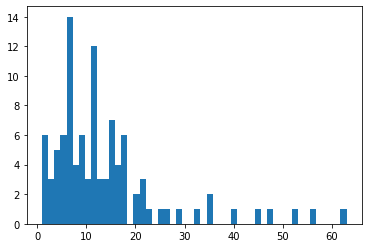

In [25]:
print('최대 길이 :', max(len(l) for l in encoded))
print('최소 길이 :', min(len(l) for l in encoded))
print('평균 길이 :', (sum(map(len,encoded))/len(encoded)))
plt.hist([len(s) for s in encoded],bins = 50)
plt.show()

In [28]:
for l in encoded:
  if len(l) < 63:
    l += [word_to_index['pad']]*(63 - len(l))
  
encoded[:2]

[[78,
  27,
  9,
  4,
  50,
  41,
  79,
  16,
  28,
  29,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]]

- Torchtext tutorial - English

In [1]:
pip install torchtext

In [2]:
from torchtext.legacy.data import TabularDataset
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [3]:
len(df)

50000

In [4]:
train_df = df[:25000]
test_df = df[25000:]

In [11]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [6]:
from torchtext.legacy import data

TEXT = data.Field(sequential = True,
                  use_vocab = True,
                  tokenize = str.split,
                  lower = True,
                  batch_first = True,
                  fix_length = 20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [13]:
from torchtext.legacy.data import TabularDataset

train_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', test='test_data.csv', format='csv',
        fields=[('text', TEXT), ('label', LABEL)], skip_header=True)

In [15]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000) # vocabulary

In [18]:
from torchtext.legacy.data import Iterator

batch_size = 5

train_loader = Iterator(dataset = train_data,batch_size = batch_size)
test_loader = Iterator(dataset = test_data,batch_size = batch_size)

batch = next(iter(train_loader)) # first mini batch

batch.text

tensor([[   9,  224,   37,  147,    2,   59,  628,    8,  639,   35,   14, 3654,
           31,    0, 1673,   27,    7,    3,  513,  331],
        [   9,  260,   10,   20,   59,   76,    9,   14,  462,    2, 1462,   12,
            9,   14,  165,    6,   28, 1825,    6,    3],
        [  10,   91,   28,    2,   78, 2528,   20,    5,   81, 1953,    9,   83,
          367,  297,   92,    0,   40, 5654,   16,   10],
        [ 186,  465,   10,   20,  124,  223,    9,   82,  202,   11,    8,    2,
         8706,   46,  125,   26,    3,  219,    5,  121],
        [  10,   14,   30,    5,   55, 4218,   15,    3, 3468,   55,  270,   64,
            2,    0, 2584,    0,   11,  477,  195,  182]])